In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
H1B_visa = pd.read_csv('C:\my files\Machine_learning_internship\Main_project\H-1B_Disclosure_Data_FY2019.csv',low_memory=False)

In [3]:
H1B_visa.shape

(664616, 260)

In [4]:
display(H1B_visa)

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,PW_OTHER_SOURCE_10,PW_NON-OES_YEAR_10,PW_SURVEY_PUBLISHER_10,PW_SURVEY_NAME_10,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,MASTERS_EXEMPTION,PUBLIC_DISCLOSURE
0,I-200-16092-327771,WITHDRAWN,04/08/2016,04/30/2019,NaN,H-1B,ASSOCIATE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,NaN
1,I-203-17188-450729,WITHDRAWN,07/14/2017,05/13/2019,NaN,E-3 Australian,ACCOUNT SUPERVISOR (MOTHER),11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I-203-17229-572307,WITHDRAWN,08/23/2017,04/30/2019,NaN,E-3 Australian,EXECUTIVE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I-203-17356-299648,WITHDRAWN,12/22/2017,08/20/2019,NaN,E-3 Australian,PROJECT MANAGEMENT LEAD,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I-203-18008-577576,WITHDRAWN,01/10/2018,04/15/2019,NaN,E-3 Australian,"CREATIVE DIRECTOR, UX",11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664611,I-200-18282-647333,CERTIFIED,10/09/2018 18:10:32,10/15/2018 22:00:43,NaN,H-1B,DIGITAL TOUCHPOINTS ANALYST,OPERATIONS RESEARCH ANALYSTS,15-2031,Y,...,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,PLACE OF BUSINESS
664612,I-200-19046-203745,DENIED,02/15/2019 16:53:11,02/22/2019 10:45:38,NaN,H-1B,APPLICATIONS CONSULTANT 2,NaN,NaN,Y,...,NaN,NaN,NaN,NaN,Y,N,Y,WAGE,NaN,PLACE OF BUSINESS
664613,I-200-19059-900658,DENIED,02/28/2019 01:11:11,03/07/2019 16:07:41,NaN,H-1B,BUSINESS SYSTEMS ANALYST 2,NaN,NaN,Y,...,NaN,NaN,NaN,NaN,Y,N,Y,WAGE,NaN,PLACE OF BUSINESS
664614,I-200-19063-784427,DENIED,03/04/2019 08:37:04,03/08/2019 12:01:58,NaN,H-1B,APPLICATIONS CONSULTANT 2,NaN,NaN,Y,...,NaN,NaN,NaN,NaN,Y,N,Y,WAGE,NaN,PLACE OF BUSINESS


In [5]:
print(H1B_visa.columns.to_list())

['CASE_NUMBER', 'CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE', 'ORIGINAL_CERT_DATE', 'VISA_CLASS', 'JOB_TITLE', 'SOC_CODE', 'SOC_TITLE', 'FULL_TIME_POSITION', 'PERIOD_OF_EMPLOYMENT_START_DATE', 'PERIOD_OF_EMPLOYMENT_END_DATE', 'TOTAL_WORKER_POSITIONS', 'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'EMPLOYER_NAME', 'EMPLOYER_BUSINESS_DBA', 'EMPLOYER_ADDRESS1', 'EMPLOYER_ADDRESS2', 'EMPLOYER_CITY', 'EMPLOYER_STATE', 'EMPLOYER_POSTAL_CODE', 'EMPLOYER_COUNTRY', 'EMPLOYER_PROVINCE', 'EMPLOYER_PHONE', 'EMPLOYER_PHONE_EXT', 'NAICS_CODE', 'AGENT_REPRESENTING_EMPLOYER', 'AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME', 'AGENT_ATTORNEY_ADDRESS1', 'AGENT_ATTORNEY_ADDRESS2', 'AGENT_ATTORNEY_CITY', 'AGENT_ATTORNEY_STATE', 'AGENT_ATTORNEY_POSTAL_CODE', 'AGENT_ATTORNEY_COUNTRY', 'AGENT_ATTORNEY_PROVINCE', 'AGENT_ATTORNEY_PHONE', 'AGENT_ATTORNEY_PHONE_EXT', 'STATE_OF_HIGHEST_COURT', 'NAME_OF_HIGHEST_STATE_COURT', '

In [6]:
H1B_visa = H1B_visa[H1B_visa.VISA_CLASS == 'H-1B']
H1B_visa = H1B_visa[H1B_visa.EMPLOYER_COUNTRY == 'UNITED STATES OF AMERICA']


In [7]:
select_columns = ['CASE_STATUS','VISA_CLASS','EMPLOYER_NAME','AGENT_REPRESENTING_EMPLOYER','SECONDARY_ENTITY_1','JOB_TITLE','SOC_TITLE','SOC_CODE', 'NAICS_CODE','CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT','NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_EMPLOYER','AMENDED_PETITION', 'H-1B_DEPENDENT', 'SUPPORT_H1B','WILLFUL_VIOLATOR','WAGE_RATE_OF_PAY_FROM_1', 'WAGE_UNIT_OF_PAY_1','TOTAL_WORKER_POSITIONS','PREVAILING_WAGE_1']
H1B_visa[select_columns]

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,AGENT_REPRESENTING_EMPLOYER,SECONDARY_ENTITY_1,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,...,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1
6,WITHDRAWN,H-1B,MH SUB I LLC,Y,NaN,DIRECTOR OF BUSINESS DEVELOPMENT,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,454111.0,0,...,0.0,0,0,N,NaN,N,100000.0,Year,1.0,97365.0
7,WITHDRAWN,H-1B,"KIIP, INC.",Y,N,HEAD OF BUSINESS DEVELOPMENT,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541990.0,1,...,0.0,0,0,N,NaN,N,131685.0,Year,1.0,131685.0
8,WITHDRAWN,H-1B,"SUNSHINE SACHS & ASSOCIATES WEST, LLC",Y,N,"ACCOUNT DIRECTOR, SOCIAL MEDIA",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541820.0,1,...,0.0,0,0,N,NaN,N,99750.0,Year,1.0,97365.0
9,WITHDRAWN,H-1B,"SOLAREDGE TECHNOLOGIES, INC.",Y,N,PRODUCT MARKETING MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,334413.0,0,...,0.0,0,0,N,NaN,N,130000.0,Year,1.0,126901.0
10,WITHDRAWN,H-1B,SOULSIGHT,Y,N,ASSOCIATE ACCOUNT STRATEGY MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541430.0,0,...,0.0,0,0,N,NaN,N,50000.0,Year,1.0,47549.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664611,CERTIFIED,H-1B,AMERICAN FAMILY MUTUAL INSURANCE COMPANY,Y,NaN,DIGITAL TOUCHPOINTS ANALYST,15-2031,OPERATIONS RESEARCH ANALYSTS,524113.0,0,...,0.0,1,0,N,NaN,N,85500.0,Year,1.0,75733.0
664612,DENIED,H-1B,CAPGEMINI AMERICA INC,N,Y,APPLICATIONS CONSULTANT 2,NaN,NaN,5416.0,0,...,0.0,0,0,Y,Y,N,80800.0,Year,1.0,80704.0
664613,DENIED,H-1B,CAPGEMINI AMERICA INC,N,Y,BUSINESS SYSTEMS ANALYST 2,NaN,NaN,5416.0,0,...,0.0,0,0,Y,Y,N,74500.0,Year,1.0,74443.0
664614,DENIED,H-1B,CAPGEMINI AMERICA INC,N,Y,APPLICATIONS CONSULTANT 2,NaN,NaN,5416.0,0,...,0.0,0,0,Y,Y,N,75900.0,Year,1.0,75858.0


In [8]:
H1B_visa.isnull().sum()[H1B_visa.isnull().sum()>0]

ORIGINAL_CERT_DATE        600216
JOB_TITLE                      1
SOC_CODE                       4
SOC_TITLE                      4
TOTAL_WORKER_POSITIONS         2
                           ...  
WILLFUL_VIOLATOR              22
SUPPORT_H1B               390907
STATUTORY_BASIS           413515
MASTERS_EXEMPTION         620175
PUBLIC_DISCLOSURE           4906
Length: 244, dtype: int64

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

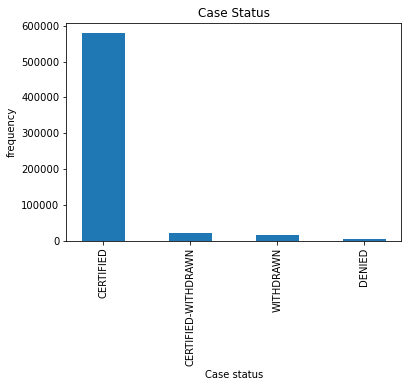

In [9]:
H1B_visa.CASE_STATUS.value_counts()
plt.bar(H1B_visa['CASE_STATUS'].value_counts().index, H1B_visa['CASE_STATUS'].value_counts(), width= 0.5, bottom=None , align='center', data=H1B_visa)
plt.title('Case Status')
plt.xlabel('Case status')
plt.ylabel('frequency')
plt.xticks(rotation='vertical')

<AxesSubplot:xlabel='EMPLOYER_NAME'>

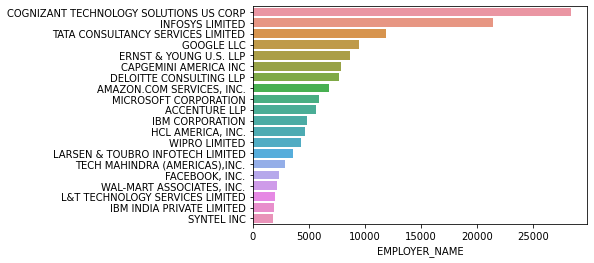

In [10]:
H1B_visa['EMPLOYER_NAME'].value_counts()
sns.barplot(x = H1B_visa['EMPLOYER_NAME'].value_counts()[:20], y = H1B_visa['EMPLOYER_NAME'].value_counts().index[:20])


<AxesSubplot:xlabel='JOB_TITLE'>

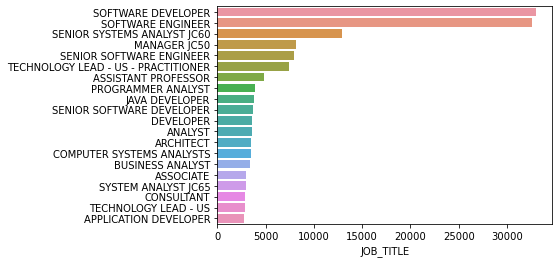

In [11]:
H1B_visa['JOB_TITLE'].value_counts()[:20]
sns.barplot(x = H1B_visa['JOB_TITLE'].value_counts()[:20], y = H1B_visa['JOB_TITLE'].value_counts().index[:20])


(array([0, 1]), [Text(0, 0, 'Y'), Text(1, 0, 'N')])

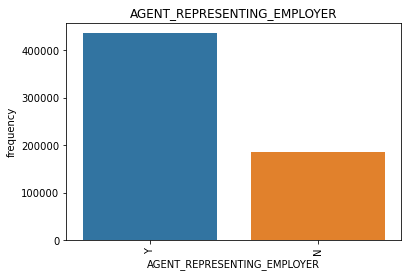

In [12]:
H1B_visa['AGENT_REPRESENTING_EMPLOYER'].value_counts()[:20]
sns.barplot(x = H1B_visa['AGENT_REPRESENTING_EMPLOYER'].value_counts().index[:20], y = H1B_visa['AGENT_REPRESENTING_EMPLOYER'].value_counts()[:20])
plt.title('AGENT_REPRESENTING_EMPLOYER')
plt.xlabel('AGENT_REPRESENTING_EMPLOYER')
plt.ylabel('frequency')
plt.xticks(rotation='vertical')

<AxesSubplot:title={'center':'Top H1B occupant companies'}, ylabel='SOC_TITLE'>

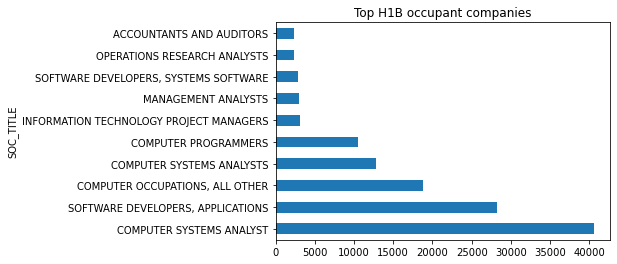

In [13]:
top_occup = H1B_visa.groupby('EMPLOYER_NAME').CASE_STATUS.count().nlargest(20).index.tolist()
top_occup_H1B_visa = H1B_visa.loc[H1B_visa.EMPLOYER_NAME.isin(top_occup)]
top_occup_H1B_visa.groupby('SOC_TITLE').EMPLOYER_NAME.count().nlargest(10).plot(kind='barh',title='Top H1B occupant companies')

<AxesSubplot:title={'center':'NAICS_CODE'}, ylabel='NAICS_CODE'>

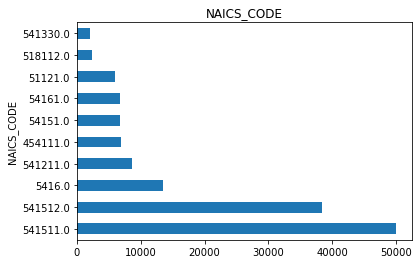

In [14]:
top_NAICS_CODE = H1B_visa.groupby('EMPLOYER_NAME').CASE_STATUS.count().nlargest(20).index.tolist()
top_NAICS_CODE_H1B_visa = H1B_visa.loc[H1B_visa.EMPLOYER_NAME.isin(top_NAICS_CODE)]
top_NAICS_CODE_H1B_visa.groupby('NAICS_CODE').EMPLOYER_NAME.count().nlargest(10).plot(kind='barh',title='NAICS_CODE')

In [15]:
H1B_visa.groupby(['TOTAL_WORKER_POSITIONS','WAGE_UNIT_OF_PAY_1']).describe()['PREVAILING_WAGE_1']

count           mean  \
TOTAL_WORKER_POSITIONS WAGE_UNIT_OF_PAY_1                            
1.0                    Bi-Weekly              108.0   19350.676852   
                       Hour                 40240.0     759.946803   
                       Month                  444.0   47475.314572   
                       Week                    93.0   12805.574409   
                       Year                539506.0   90237.090797   
...                                             ...            ...   
200.0                  Year                    15.0  128714.533333   
300.0                  Hour                     2.0      17.340000   
500.0                  Hour                     2.0      14.710000   
594.0                  Hour                     1.0      53.740000   
                       Year                     0.0            NaN   

                                                    std        min  \
TOTAL_WORKER_POSITIONS WAGE_UNIT_OF_PAY_1                            
1.0                    Bi-Weekly           33528.448605      11.40   
                       Hour                 7734.264452       7.25   
                       Month               43860.528800      12.88   
                       Week                29887.485315      11.37   
                       Year                28290.702922      11.28   
...                                                 ...        ...   
200.0                  Year                20249.127438  100235.00   
300.0                  Hour                    0.000000      17.34   
500.0                  Hour                    0.000000      14.71   
594.0                  Hour                         NaN      53.74   
                       Year                         NaN        NaN   

                                                  25%        50%          75%  \
TOTAL_WORKER_POSITIONS WAGE_UNIT_OF_PAY_1                                       
1.0                    Bi-Weekly             2236.330    2825.50    8826.1875   
                       Hour                    31.555      38.51      45.5800   
                       Month                 5550.250   43149.50   84271.2500   
                       Week                  1180.000    1278.00    1740.0000   
                       Year                 73112.000   85925.00  103938.0000   
...                                               ...        ...          ...   
200.0                  Year                112840.000  125944.00  144924.0000   
300.0                  Hour                    17.340      17.34      17.3400   
500.0                  Hour                    14.710      14.71      14.7100   
594.0                  Hour                    53.740      53.74      53.7400   
                       Year                       NaN        NaN          NaN   

                                                 max  
TOTAL_WORKER_POSITIONS WAGE_UNIT_OF_PAY_1             
1.0                    Bi-Weekly           203507.00  
                       Hour                193274.00  
                       Month               216590.00  
                       Week                135013.00  
                       Year                849680.00  
...                                              ...  
200.0                  Year                164674.00  
300.0                  Hour                    17.34  
500.0                  Hour                    14.71  
594.0                  Hour                    53.74  
                       Year                      NaN  

[93 rows x 8 columns]